In [63]:
# write your code here#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Dec  10 09:58:38 2017

@author: fushen
"""
import numpy as np 
import scipy  
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.base import BaseEstimator,RegressorMixin

In [64]:
class LinearRegressor(BaseEstimator,RegressorMixin):  
    """A Linear Regressor for ML2017-lab-01"""
    
    def __init__(self, w=0, lamda=0, eta=0.1, max_epoch=50):
        """
        Called when initializing the classifier
        """
        self.w = w
        self.lamda = lamda
        self.eta = eta
        self.max_epoch = max_epoch
        
        self.w_history = []
        
    def __h(self,w,X):
        return X.dot(w)
    
    def h(self,X):
        return self.__h(self.w,X)
    
    def __error(self,w,X,Y):
        return self.__h(w,X) - Y
    
    def error(self,X,Y):
        return self.__error(self.w,X,Y)
    
    def L(self,X,Y):
        return self.__L(self.w,X,Y)
    
    def __L(self,w,X,Y):
        num_records,num_features  = np.shape(X)  
        lamda = self.lamda
        e = self.__error(w,X,Y)
        
        regulation_loss = 1.0/2 * lamda * w.transpose().dot(w)
        loss = 1.0/2 * 1.0/float(num_records) * e.transpose().dot(e)\
            + regulation_loss
        return loss[0][0]
        
    def g(self,X,Y):
        return self.__g(self.w,X,Y)
    
    def __g(self,w,X,Y):
        num_records,num_features  = np.shape(X)
        lamda = self.lamda
        e = self.__error(w,X,Y)
        # L2 norm
        return 1.0/num_records * X.transpose().dot(e) \
                + lamda * w    
    
    
    def fit(self, X, Y):
        """
        A reference implementation of a fitting function
        Parameters
        ----------
        X : array-like or sparse matrix of shape = [n_samples, n_features]
            The training input samples.
        y : array-like, shape = [n_samples] or [n_samples, n_outputs]
            The target values (class labels in classification, real numbers in
            regression).
        Returns
        -------
        self : object
            Returns self.
        """
        for epoch in range(self.max_epoch):
            self.w = self.w - self.eta * self.g(X,Y)
            self.w_history.append(self.w)
        
        return self    
    
    def __predict(self,w,X):
        return self.__h(w,X)
    
    def predict(self, X):
        """ A reference implementation of a predicting function.
        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.
        Returns
        -------
        y : array of shape = [n_samples]
            Returns :math:`x^2` where :math:`x` is the first column of `X`.
        """
        return self.__predict(self.w,X)
    
    def __score(self,w,X,Y):
        return -np.sqrt(((self.__predict(w,X) - Y)**2).sum()/len(Y))
    
    def score(self, X, Y):
        # RMSE
        return self.__score(self.w,X,Y)
    
    def getLossHistory(self,X,Y):
        return [self.__L(w,X,Y) for w in self.w_history]
    
    def getScoreHistory(self,X,Y):
        return [self.__score(w,X,Y) for w in self.w_history]




Exhaustive Grid Search Result
The best estimator's parameter is {'eta': 0.3, 'lamda': 0}
    rank_test_score  mean_test_score  mean_train_score  mean_fit_time  \
20                1        -4.667113         -4.419309       0.007799   
21                2        -4.675269         -4.455173       0.008028   
15                3        -4.676900         -4.475078       0.007924   
16                4        -4.702341         -4.514619       0.007509   
10                5        -4.717123         -4.543482       0.008808   
11                6        -4.755560         -4.589110       0.008691   
5                 7        -4.881741         -4.731354       0.009484   
6                 8        -4.931642         -4.783656       0.010594   
22                9        -5.304207         -5.171206       0.007777   
17               10        -5.317665         -5.185810       0.007484   
12               11        -5.349907         -5.219382       0.008689   
7                12        -5.46585

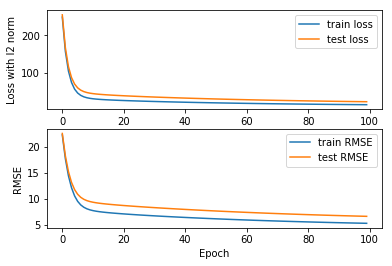

Figure of {'eta': 0.05, 'lamda': 0.01}


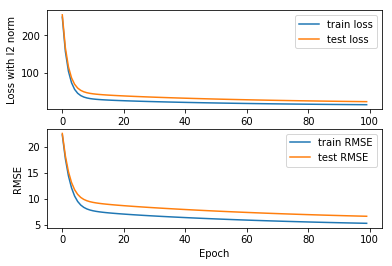

Figure of {'eta': 0.05, 'lamda': 0.1}


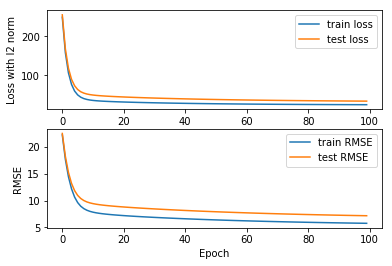

Figure of {'eta': 0.05, 'lamda': 0.5}


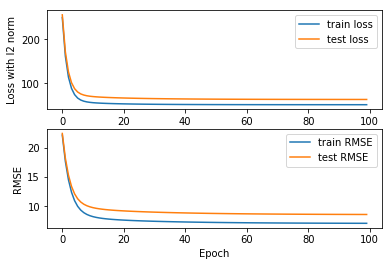

Figure of {'eta': 0.05, 'lamda': 1}


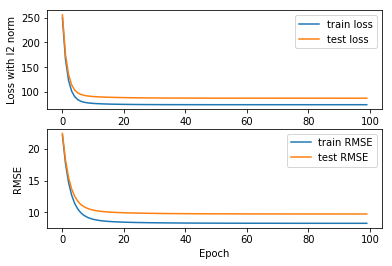

In [65]:
rgs = GridSearchCV(LinearRegressor(init_w,max_epoch=max_iterate), param_grid,return_train_score=True)
rgs.fit(X_train,Y_train)
result = pd.DataFrame(rgs.cv_results_)
result.sort_values('rank_test_score',inplace=True)

print ("Exhaustive Grid Search Result")
print ("The best estimator's parameter is",rgs.best_params_)
print (result.loc[:,['rank_test_score','mean_test_score','mean_train_score','mean_fit_time','params']])
result.to_csv(result_path)
print ("Result has been saved in",result_path)
data = load_svmlight_file("./resources/housing_scale.txt")
result_path = './results/regression_grid_search.csv'
# add interception
X = scipy.sparse.hstack(\
    (scipy.sparse.csr_matrix(np.ones((len(data[1]),1))),data[0]))
Y = data[1].reshape((len(data[1]),1))

num_records,num_features  = np.shape(X) 

X_train, X_test, Y_train, Y_test = train_test_split(\
X, Y, test_size=0.33,random_state=5)
Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

# initialize w
init_w = np.random.normal(size=(num_features,1))

max_iterate = 100

param_grid = [
  {'lamda': [0, 0.01, 0.1, 0.5, 1], 'eta': [0.05, 0.1, 0.15, 0.2, 0.3]}
 ]




print ("Printing the best 5 models loss curves")
for i in range(5):
    print ("Figure of",result.loc[i,'params'])
    regressor = LinearRegressor(init_w,max_epoch=max_iterate,**result.loc[i,'params'])
    regressor.fit(X_train,Y_train)
    loss_train = regressor.getLossHistory(X_train,Y_train)
    loss_test = regressor.getLossHistory(X_test,Y_test)
    RMSE_train = [-s for s in regressor.getScoreHistory(X_train,Y_train)]
    RMSE_test = [-s for s in regressor.getScoreHistory(X_test,Y_test)]
    
    plt.figure(i)
    plt.subplot(211)
    train_loss_line = plt.plot(range(max_iterate),loss_train,label='train loss')
    test_loss_line = plt.plot(range(max_iterate),loss_test,label='test loss')
    ax=plt.gca()
    ax.set(xlabel='Epoch', ylabel='Loss with l2 norm')
    plt.legend()
    
    plt.subplot(212)
    train_RMSE_line = plt.plot(range(max_iterate),RMSE_train,label='train RMSE')
    test_RMSE_line = plt.plot(range(max_iterate),RMSE_test,label='test RMSE')
    ax=plt.gca()
    ax.set(xlabel='Epoch', ylabel='RMSE')
    plt.legend()
    
    plt.show() 